# Indonesian School Exploration

This is the exploration for indonesian location and number of school

# Goal

Goal of the notebook

# Plan

Checklist what will be done on the notebook :

    [ ] Get Data
    [ ] Simple Analysis
    [ ] Simple Mapping

# Summary

Summary result of the notebook


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://medium.com/tinghaochen/install-geopandas-on-macos-mojave-32c0ab0b7d18
import geopandas as gpd
import fiona
from shapely.geometry import LineString, Polygon, Point
import numpy as np
import shapely
import descartes
import Levenshtein
# import geog
import shapely.geometry

In [2]:
RAW_PATH="../data/raw/"
INTERIM_PATH="../data/interim/"
PROCESSED_PATH="../data/processed/"
MODEL_PATH="../models/"

## Get Data

In [3]:
data_interim=pd.read_csv(PROCESSED_PATH+'20190901_all_sekolah_genap2019_data_latlong.csv')

## Simple Exploration


In [4]:
data_interim.head()

,provinsi,kab_kota,kecamatan,nama_sekolah,npsn,bp,status,last_sync,jml_sync,pd,rombel,guru,pegawai,ruang_kelas,ruang_lab,ruang_perpus,url_sekolah,coordinate,lintang,bujur
0,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SD N SEUNEUBOK TEUNGOH,10107900,SD,Negeri,-,0,0.0,0,0,0,6,0,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3594000,Bujur : 95.9281000",4.3594,95.9281
1,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SD NEGERI ALUE BATEE,10110676,SD,Negeri,-,0,0.0,0,0,0,6,0,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3453000,Bujur : 95.9736000",4.3453,95.9736
2,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SD NEGERI ALUE SUNDAK,10110270,SD,Negeri,-,0,0.0,0,0,0,6,0,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3257000,Bujur : 95.9761000",4.3257,95.9761
3,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SD NEGERI ARONGAN WOYLA,10107859,SD,Negeri,-,0,0.0,0,0,0,6,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.2994000,Bujur : 95.9536000",4.2994,95.9536
4,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SD NEGERI COT BULOH,10107863,SD,Negeri,-,0,0.0,0,0,0,6,0,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3252000,Bujur : 95.9576000",4.3252,95.9576


In [5]:
data_interim.shape

(218135, 20)

In [6]:
data_interim[(data_interim.lintang.isnull())]

,provinsi,kab_kota,kecamatan,nama_sekolah,npsn,bp,status,last_sync,jml_sync,pd,rombel,guru,pegawai,ruang_kelas,ruang_lab,ruang_perpus,url_sekolah,coordinate,lintang,bujur
427,Prov. Aceh,Kab. Aceh Besar,Kec. Blang Bintang,SMPIT DAYAH MULIA,69989827,SMP,Swasta,-,0,0.0,0,0,0,0,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,NaN,NaN,NaN
2074,Prov. Aceh,Kab. Aceh Tenggara,Kec. Deleng Pokhkisen,SD NEGERI DELENG POKHKISEN,69989335,SD,Negeri,-,0,0.0,0,0,0,0,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,NaN,NaN,NaN
2878,Prov. Aceh,Kab. Aceh Utara,Kec. Matangkuli,SMP SWASTA NURUL KAMAL ALA ZIZIYYAH,69989747,SMP,Swasta,-,0,0.0,0,0,0,0,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,NaN,NaN,NaN
4835,Prov. Kepulauan Bangka Belitung,Kab. Belitung,Kec. Sijuk,SMK NEGERI 1 SIJUK,69989330,SMK,Negeri,-,0,0.0,0,0,0,0,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,NaN,NaN,NaN
6195,Prov. Kalimantan Barat,Kab. Bengkayang,Kec. Monterado,SMP NEGERI 7 MONTERADO,69989623,SMP,Negeri,-,0,0.0,0,0,0,0,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,NaN,NaN,NaN
9245,Prov. Jawa Timur,Kab. Blitar,Kec. Sanankulon,SMP ISLAM AFADA,69989475,SMP,Swasta,-,0,0.0,0,0,0,0,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,NaN,NaN,NaN
10021,Prov. Jawa Tengah,Kab. Blora,Kec. Kota Blora,SMP PLUS INSAN GEMILANG,69902429,SMP,Swasta,-,0,0.0,0,0,0,3,2,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang :,Bujur :",NaN,NaN
16278,Prov. Jawa Timur,Kab. Bondowoso,Kec. Wringin,SMK ZAINUL BAHAR,69989467,SMK,Swasta,-,0,0.0,0,0,0,0,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,NaN,NaN,NaN
21822,Prov. Sulawesi Tenggara,Kab. Buton,Kec. Siontapia,SMKN KEMARITIMAN SIOTAPINA,69989826,SMK,Negeri,-,0,0.0,0,0,0,0,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,NaN,NaN,NaN
23336,Prov. Jawa Barat,Kab. Cianjur,Kec. Bojong Picung,SMP ISLAM TERPADU IBNU SINA,69989361,SMP,Swasta,-,0,0.0,0,0,0,0,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,NaN,NaN,NaN


In [7]:
data_interim2=data_interim[~(data_interim.lintang.isnull())]

In [8]:
data_interim2.shape

(217566, 20)

there are 21 school has bad url, some school is exist, and some school has different URL

In [9]:
data_prov1=data_interim2.groupby(['provinsi','kab_kota']).size().reset_index()
data_prov1.columns=['provinsi','kab_kota','number_skul']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

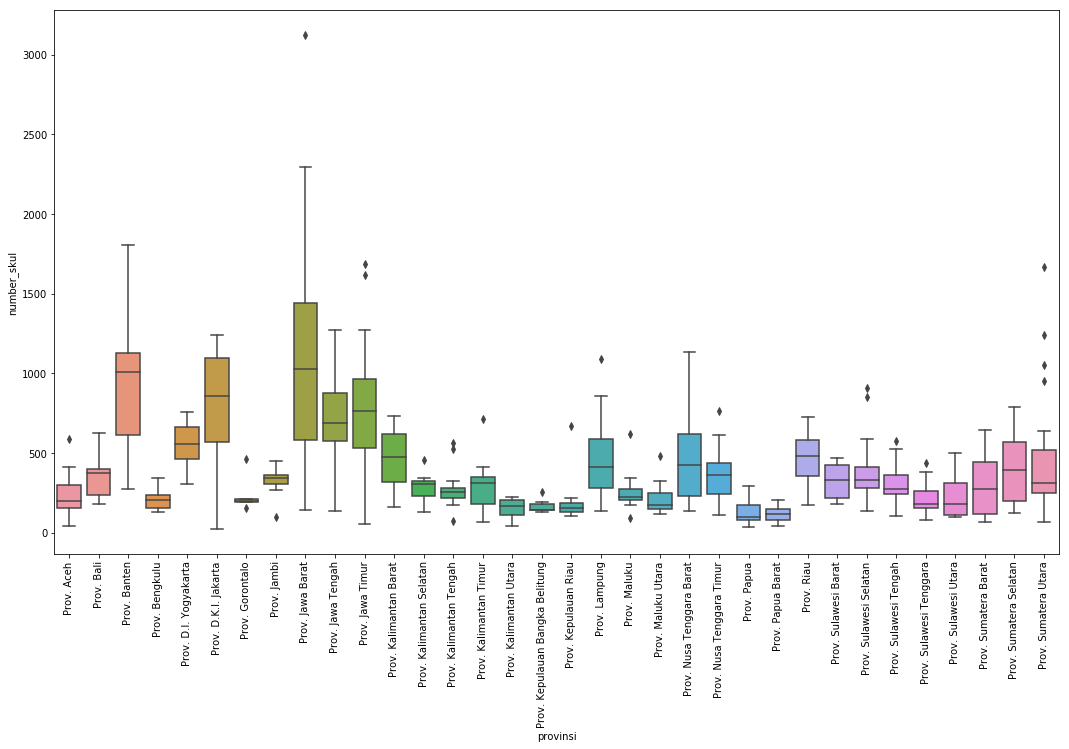

In [10]:
plt.figure(figsize=(18,10))
sns.boxplot(x='provinsi',y='number_skul',data=data_prov1)
plt.xticks(rotation=90)

There are outlier kabupaten kota in provinsi in terms of schools number. Need to know the citizen size

## Get The Map

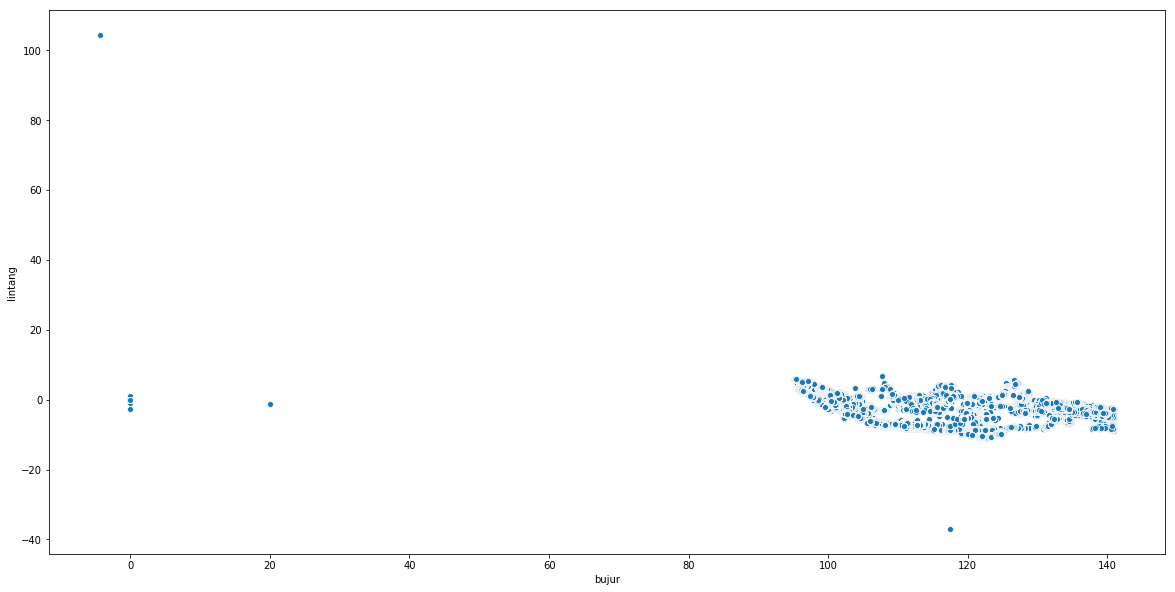

In [11]:
# data_interim2
plt.figure(figsize=(20,10))
sns.scatterplot(x='bujur',y='lintang',data=data_interim2)

In [12]:
## Bad location
len(data_interim2[data_interim2.bujur<40])

681

In [15]:
data_interim3=data_interim2[(data_interim2.bujur>40)&(data_interim2.lintang>-20)]
data_interim3.kecamatan=data_interim3.kecamatan.apply(lambda x: x.replace('Kecamatan ','Kec. '))

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


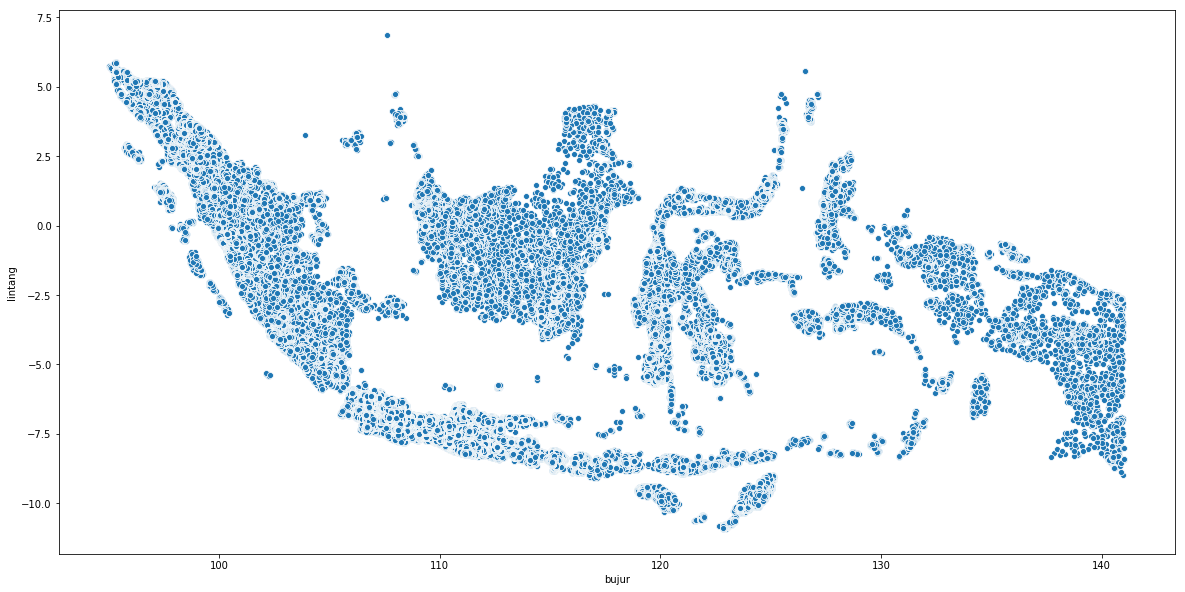

In [16]:
# data_interim2
plt.figure(figsize=(20,10))
sns.scatterplot(x='bujur',y='lintang',data=data_interim3)

In [17]:
data_interim3.head()

,provinsi,kab_kota,kecamatan,nama_sekolah,npsn,bp,status,last_sync,jml_sync,pd,rombel,guru,pegawai,ruang_kelas,ruang_lab,ruang_perpus,url_sekolah,coordinate,lintang,bujur
0,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SD N SEUNEUBOK TEUNGOH,10107900,SD,Negeri,-,0,0.0,0,0,0,6,0,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3594000,Bujur : 95.9281000",4.3594,95.9281
1,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SD NEGERI ALUE BATEE,10110676,SD,Negeri,-,0,0.0,0,0,0,6,0,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3453000,Bujur : 95.9736000",4.3453,95.9736
2,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SD NEGERI ALUE SUNDAK,10110270,SD,Negeri,-,0,0.0,0,0,0,6,0,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3257000,Bujur : 95.9761000",4.3257,95.9761
3,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SD NEGERI ARONGAN WOYLA,10107859,SD,Negeri,-,0,0.0,0,0,0,6,0,0,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.2994000,Bujur : 95.9536000",4.2994,95.9536
4,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SD NEGERI COT BULOH,10107863,SD,Negeri,-,0,0.0,0,0,0,6,0,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3252000,Bujur : 95.9576000",4.3252,95.9576


In [18]:
# fp = MODEL_PATH+'SHP_Indonesia_kecamatan/INDONESIA_KEC.shp'
# fp = MODEL_PATH+'IDN_adm/IDN_adm2.shp'
fp = MODEL_PATH+'gadm36_IDN_shp/gadm36_IDN_2.shp'
map_df = gpd.read_file(fp)
# shape_fp = fiona.open(fp)
# shape_fp =shapefile.Reader(fp)

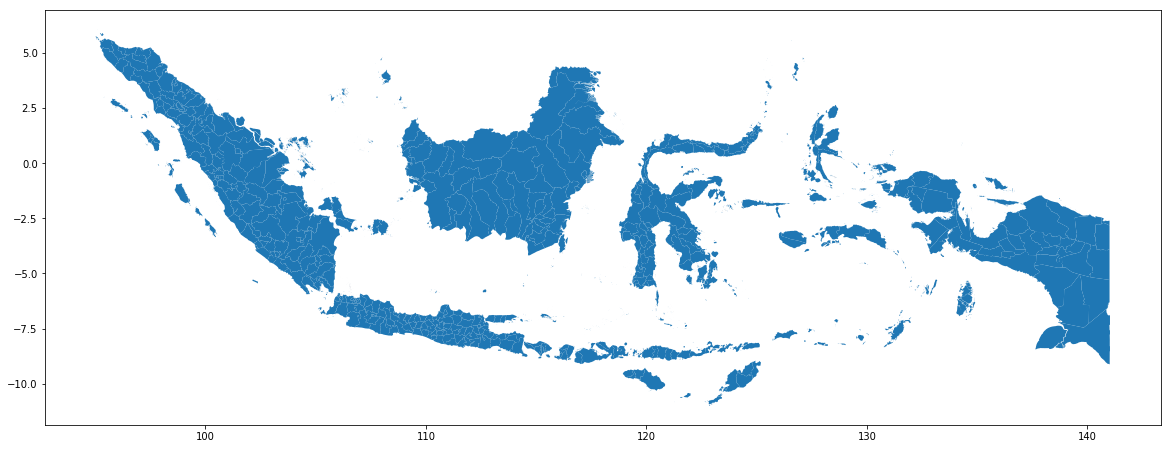

In [19]:
map_df.plot(figsize=(20,10))

In [20]:
map_df.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,None,Kabupaten,Regency,1107,ID.AC.AB,"POLYGON ((96.13204956 4.1340785, 96.13215637 4..."
1,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.1_1,Aceh Barat Daya,None,None,Kabupaten,Regency,1112,ID.AC.AD,"(POLYGON ((96.80517578 3.72169065, 96.80581665..."
2,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.3_1,Aceh Besar,None,None,Kabupaten,Regency,1108,ID.AC.AR,"(POLYGON ((95.20544434 5.28072309, 95.20562744..."
3,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.4_1,Aceh Jaya,None,None,Kabupaten,Regency,1116,ID.AC.AJ,"(POLYGON ((95.87687683 4.36749554, 95.87683868..."
4,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.5_1,Aceh Selatan,None,None,Kabupaten,Regency,1103,ID.AC.AS,"(POLYGON ((97.59461211999999 2.80776739, 97.59..."


In [21]:
map_df.shape

(502, 14)

In [22]:
map_df[map_df.NAME_2.str.contains('Teluk Wondama')]

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
348,IDN,Indonesia,IDN.22_1,Papua Barat,None,IDN.22.11_1,Teluk Wondama,None,None,Kabupaten,Regency,9103,ID.IB.TW,"(POLYGON ((134.48284912 -2.85963702, 134.47990..."


## Example Mapping

In [23]:
data_interim3[data_interim3.kab_kota.str.contains('Teluk Wondama')].shape

(73, 20)

In [24]:
## Example Mapping

data_point_example=data_interim3[data_interim3.kab_kota.str.contains('Teluk Wondama')]
geom=[Point(xy) for xy in zip(data_point_example['bujur'],data_point_example['lintang'])]
crs={'init':'epsg:4326'}
geo_data_point=gpd.GeoDataFrame(data_point_example,crs=crs,geometry=geom)

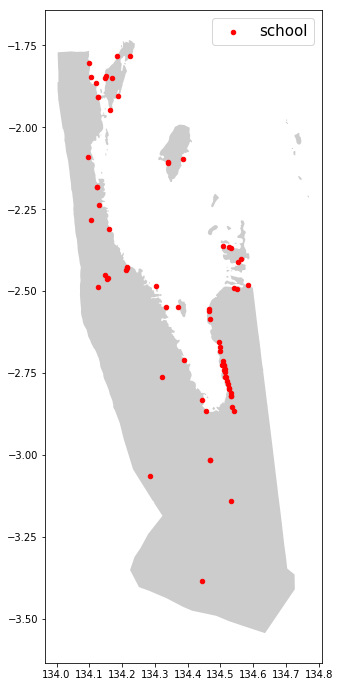

In [25]:
fig,ax=plt.subplots(figsize=(12,12))
map_df[map_df.NAME_2.str.contains('Teluk Wondama')].plot(ax=ax,alpha=0.4,color='grey')
geo_data_point.plot(ax=ax,markersize=20,color='red',label='school')
plt.legend(prop={'size':15})

## Kabupaten Kota Check
to merging 2 dataset

In [26]:
len(data_interim3.kab_kota.unique())

514

In [27]:
len(map_df.NAME_2.unique())

501

In [28]:
## Checking the Kabupaten Kota Name with Levenshtein and point inside polygon

In [29]:
data_L=[]
for k1 in data_interim3.kab_kota.unique():
    print(k1)
    for k2 in map_df.NAME_2.unique():
        LD=Levenshtein.ratio(k1,k2)
#         https://stackoverflow.com/questions/30405652/how-to-find-which-points-intersect-with-a-polygon-in-geopandas
        if LD>0.45:
            our_point=data_interim3[data_interim3.kab_kota==k1]
            our_point=gpd.GeoSeries([Point(xy) for xy in zip(our_point['bujur'],our_point['lintang'])])
            poly=map_df[map_df.NAME_2==k2].geometry.values[0]

            len_intersect=our_point.intersects(poly).sum()
            len_our_point=len(our_point)
            Inter_R=len_intersect/len_our_point
        else:
            Inter_R=np.nan
            
        data_L.append([k1,k2,LD,Inter_R])
        
df_data_L=pd.DataFrame(data_L,columns=['Our Data','Map Data','Lev_ratio','Inter_Ratio'])

Kab. Aceh Barat
Kab. Aceh Barat Daya
Kab. Aceh Besar
Kab. Aceh Jaya
Kab. Aceh Selatan
Kab. Aceh Singkil
Kab. Aceh Tamiang
Kab. Aceh Tengah
Kab. Aceh Tenggara
Kab. Aceh Timur
Kab. Aceh Utara
Kab. Agam
Kab. Alor
Kab. Bekasi
Kab. Belitung
Kab. Belitung Timur
Kab. Belu
Kab. Bener Meriah
Kab. Bengkalis
Kab. Bengkayang
Kab. Bengkulu Selatan
Kab. Bengkulu Tengah
Kab. Bengkulu Utara
Kab. Berau
Kab. Biak Numfor
Kab. Bima
Kab. Bintan
Kab. Bireuen
Kab. Blitar
Kab. Blora
Kab. Boalemo
Kab. Bogor
Kab. Bojonegoro
Kab. Bolaang Mongondow
Kab. Bolaang Mongondow Selatan
Kab. Bolaang Mongondow Timur
Kab. Bolaang Mongondow Utara
Kab. Bombana
Kab. Bondowoso
Kab. Bone
Kab. Bone Bolango
Kab. Boven Digoel
Kab. Boyolali
Kab. Brebes
Kab. Buleleng
Kab. Bulukumba
Kab. Bulungan
Kab. Bungo
Kab. Buol
Kab. Buru
Kab. Buru Selatan
Kab. Buton
Kab. Buton Selatan
Kab. Buton Tengah
Kab. Buton Utara
Kab. Ciamis
Kab. Cianjur
Kab. Asahan
Kab. Asmat
Kab. Badung
Kab. Balangan
Kab. Bandung
Kab. Cilacap
Kab. Cirebon
Kab. Dairi
Kab

In [30]:
df_data_L['Rank'] = df_data_L.groupby('Our Data').Inter_Ratio.transform(lambda x: x.rank(ascending=0))
df_data_L.head()

,Our Data,Map Data,Lev_ratio,Inter_Ratio,Rank
0,Kab. Aceh Barat,Aceh Barat,0.800000,1.0,1.0
1,Kab. Aceh Barat,Aceh Barat Daya,0.666667,0.0,19.5
2,Kab. Aceh Barat,Aceh Besar,0.640000,0.0,19.5
3,Kab. Aceh Barat,Aceh Jaya,0.583333,0.0,19.5
4,Kab. Aceh Barat,Aceh Selatan,0.518519,0.0,19.5


In [31]:
df_data_L.to_csv(INTERIM_PATH+'20190901_reference_our_data_to_map.csv',index=False)

In [32]:
df_data_L2=df_data_L[(df_data_L.Rank==1)]

In [33]:
cek_uniq_map=df_data_L2.groupby(['Map Data']).size()
double_map=cek_uniq_map[cek_uniq_map>1].index.tolist()

df_data_L2[df_data_L2['Map Data'].isin(double_map)].sort_values('Map Data')

,Our Data,Map Data,Lev_ratio,Inter_Ratio,Rank
77043,Kab. Banggai Laut,Banggai Kepulauan,0.588235,1.000000,1.0
76542,Kab. Banggai Kepulauan,Banggai Kepulauan,0.871795,0.983806,1.0
256208,Kota Banjarbaru,Banjar Baru,0.692308,0.954198,1.0
98894,Kab. Banjar,Banjar Baru,0.545455,0.037118,1.0
25953,Kab. Buton,Buton,0.666667,1.000000,1.0
26955,Kab. Buton Tengah,Buton,0.454545,1.000000,1.0
67407,Kab. Kepulauan Sula,Kepulauan Sula,0.848485,1.000000,1.0
221715,Kab. Pulau Taliabu,Kepulauan Sula,0.500000,0.992701,1.0
71046,Kab. Kolaka,Kolaka,0.705882,1.000000,1.0
71547,Kab. Kolaka Timur,Kolaka,0.521739,0.990196,1.0


In [34]:
df_data_L2['Rank2'] = df_data_L2.groupby('Map Data').Inter_Ratio.transform(lambda x: x.rank(ascending=0))

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
df_data_ref_used=df_data_L2[(df_data_L2.Rank2==1)]

In [36]:
df_data_ref_used.shape

(492, 6)

In [37]:
len(df_data_ref_used['Map Data'].unique())

492

In [38]:
## Not Used Map Data
set(map_df.NAME_2.unique())-set(df_data_ref_used['Map Data'].unique())

{'Buton',
 'Danau',
 'Danau Limboto',
 'Lake Toba',
 'Mamuju Utara',
 'Morowali',
 'Pontianak',
 'Waduk Cirata',
 'Waduk Kedungombo'}

In [39]:
## check existency
data_interim3[data_interim3.kab_kota.str.contains('Pontianak')].kab_kota.unique()

array(['Kota Pontianak'], dtype=object)

In [40]:
df_data_ref_used[df_data_ref_used['Our Data'].isin(['Kota Pontianak'])]

,Our Data,Map Data,Lev_ratio,Inter_Ratio,Rank,Rank2
162009,Kota Pontianak,Kota Pontianak,1.0,0.993548,1.0,1.0


In [41]:
df_data_ref_used.to_csv(INTERIM_PATH+'20190901_reference_our_data_to_map_used.csv',index=False)

## Mapping several Big Province

Jakarta, Yogyakarta, Bali, West Sumatra

In [42]:
def get_school_map(prov_name,map_data,source_data):
    data_point_example=source_data[source_data.NAME_1==prov_name]
    geom=[Point(xy) for xy in zip(data_point_example['bujur'],data_point_example['lintang'])]
    crs={'init':'epsg:4326'}
    geo_data_point=gpd.GeoDataFrame(data_point_example,crs=crs,geometry=geom)
    
    fig,ax=plt.subplots(figsize=(12,12))
    map_data[map_data.NAME_1==prov_name].plot(ax=ax,alpha=0.4,color='grey')
    geo_data_point.plot(ax=ax,markersize=20,color='red',label='school')
    plt.legend(prop={'size':15})

In [43]:
map_df.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,None,Kabupaten,Regency,1107,ID.AC.AB,"POLYGON ((96.13204956 4.1340785, 96.13215637 4..."
1,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.1_1,Aceh Barat Daya,None,None,Kabupaten,Regency,1112,ID.AC.AD,"(POLYGON ((96.80517578 3.72169065, 96.80581665..."
2,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.3_1,Aceh Besar,None,None,Kabupaten,Regency,1108,ID.AC.AR,"(POLYGON ((95.20544434 5.28072309, 95.20562744..."
3,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.4_1,Aceh Jaya,None,None,Kabupaten,Regency,1116,ID.AC.AJ,"(POLYGON ((95.87687683 4.36749554, 95.87683868..."
4,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.5_1,Aceh Selatan,None,None,Kabupaten,Regency,1103,ID.AC.AS,"(POLYGON ((97.59461211999999 2.80776739, 97.59..."


In [44]:
# map_df[['NAME_2','NAME_1']]

In [45]:
df_data_ref_used.columns=['kab_kota','NAME_2','Lev_Ratio','Inter_Ratio','Rank','Rank2']

In [46]:
data_interim4=pd.merge(data_interim3,df_data_ref_used[['kab_kota','NAME_2']],on='kab_kota',how='left')
data_interim4=pd.merge(data_interim4,map_df[['NAME_2','NAME_1']],on='NAME_2',how='left')

In [47]:
# data_interim4

In [48]:
data_interim4.NAME_1.unique()

array(['Aceh', 'Sumatera Barat', 'Nusa Tenggara Timur', 'Jawa Barat',
       'Bangka Belitung', 'Riau', 'Kalimantan Barat', 'Bengkulu',
       'Kalimantan Timur', 'Papua', 'Nusa Tenggara Barat',
       'Kepulauan Riau', 'Jawa Timur', 'Jawa Tengah', 'Gorontalo',
       'Sulawesi Utara', 'Sulawesi Tenggara', 'Sulawesi Selatan', 'Bali',
       'Jambi', 'Sulawesi Tengah', 'Maluku', nan, 'Sumatera Utara',
       'Kalimantan Selatan', 'Sumatera Selatan', 'Papua Barat',
       'Yogyakarta', 'Kalimantan Tengah', 'Maluku Utara', 'Jakarta Raya',
       'Lampung', 'Banten', 'Sulawesi Barat'], dtype=object)

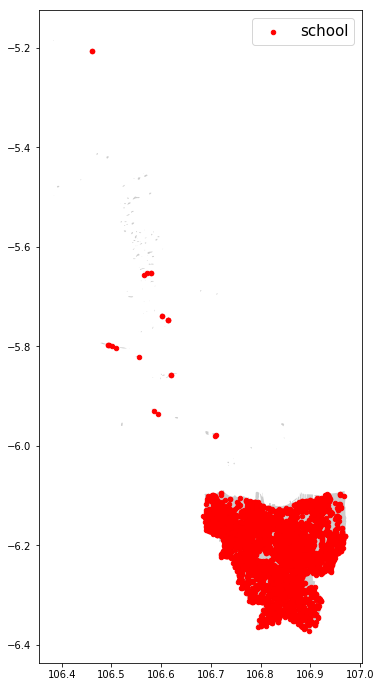

In [49]:
get_school_map('Jakarta Raya',map_df,data_interim4)

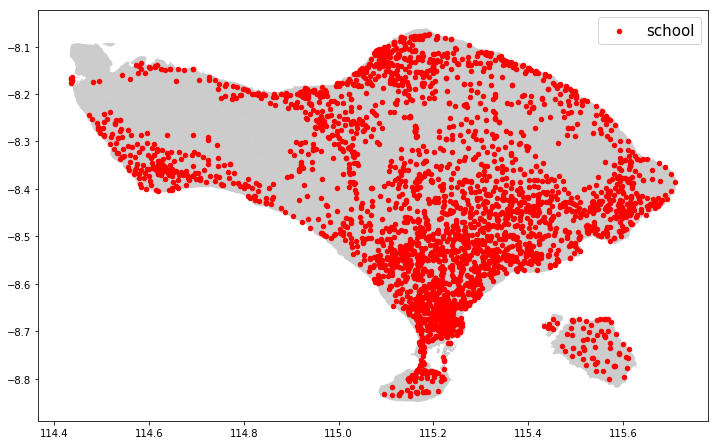

In [50]:
get_school_map('Bali',map_df,data_interim4)

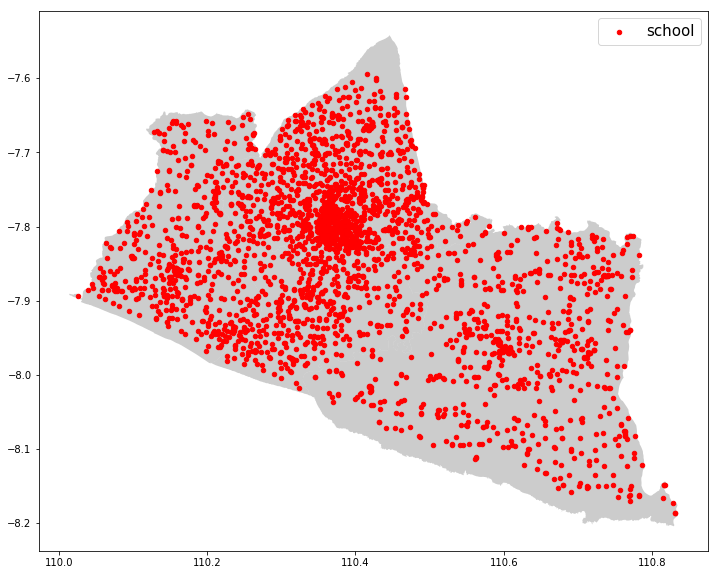

In [51]:
get_school_map('Yogyakarta',map_df,data_interim4)

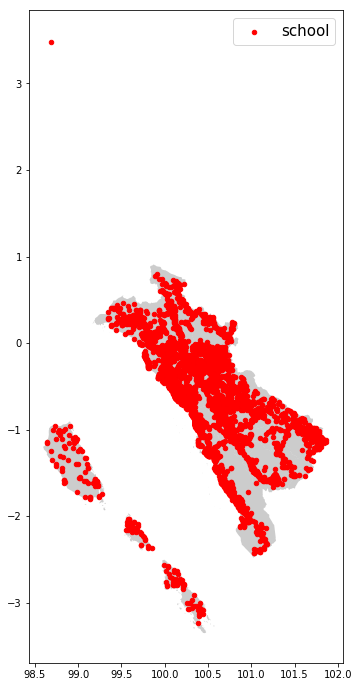

In [52]:
get_school_map('Sumatera Barat',map_df,data_interim4)

In [53]:
# https://gis.stackexchange.com/questions/207731/generating-random-coordinates-in-multipolygon-in-python

In [54]:
data_interim4[~(data_interim4.NAME_2.isnull())].shape

(212329, 22)

In [55]:
data_interim4.shape

(217023, 22)

In [56]:
## Create Circle
# xmin, xmax, ymin, ymax = 1, 10, 1, 10
# xc = (xmax - xmin) * np.random.random(3) + xmin
# yc = (ymax - ymin) * np.random.random(3) + ymin
# pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

# circles = pts.buffer(1)
# circles.plot()

In [57]:
# import geoplot as gplt
# nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
# nyc_collision_factors = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

In [58]:
data_interim4[data_interim4.nama_sekolah.str.contains('SMK')]

,provinsi,kab_kota,kecamatan,nama_sekolah,npsn,bp,status,last_sync,jml_sync,pd,...,pegawai,ruang_kelas,ruang_lab,ruang_perpus,url_sekolah,coordinate,lintang,bujur,NAME_2,NAME_1
15,Prov. Aceh,Kab. Aceh Barat,Kec. Arongan Lambalek,SMK SWASTA ARONGAN LAMBALEK,10110273,SMK,Swasta,-,0,0.0,...,0,3,0,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3150000,Bujur : 95.9614000",4.315000,95.961400,Aceh Barat,Aceh
72,Prov. Aceh,Kab. Aceh Barat,Kec. Johan Pahlawan,SMK NEGERI 1 MEULABOH,10102571,SMK,Negeri,-,0,0.0,...,0,21,5,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.1760000,Bujur : 96.1363000",4.176000,96.136300,Aceh Barat,Aceh
73,Prov. Aceh,Kab. Aceh Barat,Kec. Johan Pahlawan,SMK NEGERI 2 MEULABOH,10110269,SMK,Negeri,-,0,0.0,...,0,34,2,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.1766000,Bujur : 96.1380000",4.176600,96.138000,Aceh Barat,Aceh
74,Prov. Aceh,Kab. Aceh Barat,Kec. Johan Pahlawan,SMK NEGERI 3 MEULABOH,10108105,SMK,Negeri,-,0,0.0,...,0,14,2,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.1770000,Bujur : 96.1357000",4.177000,96.135700,Aceh Barat,Aceh
75,Prov. Aceh,Kab. Aceh Barat,Kec. Johan Pahlawan,SMK NEGERI 4 MEULABOH,10111328,SMK,Negeri,-,0,0.0,...,0,12,1,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.1717000,Bujur : 96.1067000",4.171700,96.106700,Aceh Barat,Aceh
102,Prov. Aceh,Kab. Aceh Barat,Kec. Kaway XVI,SMK NEGERI 1 KAWAY XVI,10108265,SMK,Negeri,-,0,0.0,...,0,9,3,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3445000,Bujur : 96.1830000",4.344500,96.183000,Aceh Barat,Aceh
135,Prov. Aceh,Kab. Aceh Barat,Kec. Meureubo,SMK NEGERI 1 MEUREUBO,10111327,SMK,Negeri,-,0,0.0,...,0,6,1,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.1372000,Bujur : 96.1693000",4.137200,96.169300,Aceh Barat,Aceh
154,Prov. Aceh,Kab. Aceh Barat,Kec. Pantee Ceureumen,SMK NEGERI 1 PANTE CEUREUMEN,10108272,SMK,Negeri,-,0,0.0,...,0,7,5,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.4837000,Bujur : 96.3899000",4.483700,96.389900,Aceh Barat,Aceh
185,Prov. Aceh,Kab. Aceh Barat,Kec. Samatiga,SMK NEGERI 1 SAMATIGA,10108106,SMK,Negeri,-,0,0.0,...,0,15,2,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.2165000,Bujur : 96.0770000",4.216500,96.077000,Aceh Barat,Aceh
243,Prov. Aceh,Kab. Aceh Barat,Kec. Woyla,SMK NEGERI 1 WOYLA,10107959,SMK,Negeri,-,0,0.0,...,0,21,2,1,http://dapo.dikdasmen.kemdikbud.go.id/sekolah/...,"Lintang : 4.3904000,Bujur : 96.0408000",4.390400,96.040800,Aceh Barat,Aceh


In [ ]:
# data_interim4.to_csv(PROCESSED_PATH+"20190814_data_ready.csv")

## Conclusions